### Listar el contenido del directorio dbfs:/tmp/wiki_data/

In [0]:
files = dbutils.fs.ls("dbfs:/tmp/wiki_data/")
for file in files:
    print(file.path)

dbfs:/tmp/wiki_data/test.parquet
dbfs:/tmp/wiki_data/train.parquet
dbfs:/tmp/wiki_data/train_labels.csv


### Cargar los datos de entrenamiento, de prueba y las etiquetas

In [0]:
train_df = spark.read.format('parquet').options(header=True,inferSchema=True).load("dbfs:/tmp/wiki_data/train.parquet")
test_df = spark.read.format('parquet').options(header=True,inferSchema=True).load("dbfs:/tmp/wiki_data/test.parquet")
train_labels = spark.read.csv("dbfs:/tmp/wiki_data/train_labels.csv", header=True, inferSchema=True, sep=";")

### Análisis exploratorio de datos (EDA)

In [0]:
# Obtener la cantidad de filas y columnas de los datasets
print((train_df.count(), len(train_df.columns)))
print((test_df.count(), len(test_df.columns)))
print((train_labels.count(), len(train_labels.columns)))

(5531451, 190)
(11363762, 190)
(458913, 2)


In [0]:
# Observar primeros registros del dataset con las etiquetas
train_labels.show(3)

+--------------------+------+
|         customer_ID|target|
+--------------------+------+
|0000099d6bd597052...|     0|
|00000fd6641609c6e...|     0|
|00001b22f846c82c5...|     0|
+--------------------+------+
only showing top 3 rows



In [0]:
# Observar primeros registros del dataset de entrenamiento
display(train_df.limit(3))

customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-03-09,0.9384687,0,0.008724451,1.0068382,0.009227722,0.12403516,0.0,0.0047092405,null,null,0,6,0.7089063,0.17060024,0,0.35858658,0.52535105,0.25573608,-1,0.063902214,0.05941573,0.0,0.14869796,4,0.008206739,0,0.20733388,0.7364627,0.09621881,null,0.023381121,0.0027680616,0,1.0,0,0.16134483,0.14826606,2896,0.35459602,0.15202524,0.11807513,0,0.15861195,0.06572835,0.018384619,8,0.19961701,0.30823326,0.016360575,15,0.091071025,0,0,0,0,null,0.65298444,0,-1,0,6,0.27200758,0.008362539,524,0.0026440262,0.009013299,0,0,0.119403206,0,4,0.05088185,null,0.0,1,1,null,0.0043267864,0.0,null,0.0077286493,2.7182797E-4,0,0,0,-1,0.0022709374,0,0,0,0.0023102975,0,1,0.008033023,1.0,0.08468261,0,0,0.0,0,0,0,null,0,0,0,-1,0,0,null,1,0.0025372095,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.8940897,0.13556081,0.91119146,0.9745386,0.0012434034,0.7666882,1,1.0045869,0.89373416,-1,2,0.009968482,0.0045716083,-1,1.0089488,2,-1,0,null,-1,null,1.0,0.21006043,0.6769222,0,1,0.23825021,0,5,0.23211995,0.23626566,0,0.70228016,3,0,16,0,2,1,1.0078186,1,0,null,0.0,0.0,null,0.0043450594,0,null,-1,-1,-1,-1,0,0,0.0,null,0,6.0983706E-4,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-04-07,0.9366646,0,0.0049233525,1.0006531,0.006151309,0.12674998,0.0,0.0027135753,null,null,0,5,0.7127947,0.113238625,0,0.35362956,0.5213113,0.22332887,-1,0.06526106,0.057743765,0.0,0.14972253,4,0.00837324,0,0.20277765,0.7208864,0.09980397,null,0.030598553,0.002749363,0,1.0,0,0.14095053,0.1435299,2896,0.32675698,0.1562009,0.11873748,0,0.1484595,0.09393538,0.013034827,8,0.15138699,0.26502597,0.017687928,15,0.08680481,0,0,0,0,null,0.6470931,0,-1,0,6,0.18896966,0.0040295734,524,0.004193118,0.007842384,0,0,0.14061072,0,4,0.040468886,null,0.0,1,1,null,0.004202757,0.0,null,0.0018641321,9.788894E-4,0,0,0,-1,0.00981023,0,0,0,0.0013267265,0,1,7.604418E-4,1.0,0.08184324,0,0,0.0,0,0,0,null,0,0,0,-1,0,0,null,1,0.008427195,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.90213543,0.13633254,0.9198764,0.9756245,0.004561384,0.7860069,1,1.0041181,0.9068411,-1,2,0.0039209975,0.0046538454,-1,1.0032054,2,-1,0,null,-1,null,1.0,0.18409272,0.82228094,0,1,0.24721733,0,5,0.24353164,0.24188478,0,0.70701677,3,0,16,0,2,1,1.004333,1,0,null,0.0,0.0,null,0.007494781,0,null,-1,-1,-1,-1,0,0,0.0,null,0,0.005492045,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-05-28,0.9541803,3,0.021654664,1.0096722,0.006815219,0.123976685,0.0,0.00942266,null,null,0,5,0.7208836,0.060492333,0,0.33465013,0.5245677,0.18942398,-1,0.06698193,0.056646686,0.0,0.15195535,4,0.00935453,0,0.20662901,0.738044,0.13407318,null,0.048366975,0.0100772735,0,1.0,0,0.11222949,0.13701394,3166,0.304124,0.15379456,0.11453429,0,0.1395039,0.08475696,0.056653388,8,0.30588323,0.21216542,0.06395489,15,0.09400143,0,0,0,0,null,0.6458195,0,-1,0,6,0.49530846,0.0068381545,702,0.0013365584,0.0060252715,0,0,0.07586799,0,4,0.047454197,null,0.0,1,1,null,0.0017821196,0.0,null,0.005418535,0.006148903,0,0,0,-1,0.009362285,0,0,0,0.0076237

In [0]:
# Observar primeros registros del dataset de prueba
display(test_df.limit(3))

customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,2019-02-19,0.63131535,0,0.010728086,0.8144969,0.0,0.16865084,0.0,0.002346993,0.11318889,null,0,9,0.004482522,0.009516775,0,null,0.47438335,0.62646693,-1,0.17459108,1.2506765,1.0039254,null,0,0.0010129374,1,0.11904347,null,-0.002918642,null,0.0027711124,0.0044161137,1,1.0,0,0.1055866,0.11919808,996,0.11456353,null,null,0,0.20589781,null,0.010182195,-1,0.02747162,0.5887337,0.010488577,52,0.05181097,0,-1,0,0,null,0.59210324,0,-1,0,-1,0.19051576,0.0026754835,415,0.009990462,null,0,-1,0.014684133,0,7,1.1347919,0.17886236,0.95953107,3,3,null,0.009798512,0.0,0.002916108,0.0068955813,0.0016564517,0,-1,0,-1,0.002531028,0,0,0,0.0045846575,0,1,0.005093209,1.0,0.13380393,0,-1,0.0,0,0,0,null,0,0,0,-1,0,0,null,1,0.008999351,0,0,0,0,0,1,0,0,0,-1,0,0,0,0,0,0,0.9810777,0.13491555,0.9546644,0.97108626,0.00656218,0.002418615,-1,null,null,-1,-1,0.008145522,0.007969564,-1,null,1,-1,0,null,-1,null,1.0,0.27420256,0.0043015503,-1,-1,null,-1,-1,null,null,-1,null,-1,-1,-1,-1,1,0,null,-1,0,null,null,null,null,0.007081548,0,null,-1,-1,-1,-1,-1,0,null,null,-1,0.008280723,-1
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,2019-03-25,0.5870423,0,0.011026369,0.8108478,0.0,0.24138896,0.0,0.009131843,0.12303543,null,0,10,0.009497418,0.02631281,0,null,0.47358724,0.6116821,-1,0.17711546,0.23416875,1.0093013,null,0,0.0055332542,1,0.120990865,null,0.031221505,null,0.0064965487,0.010002997,1,1.0,0,0.16056216,0.121489555,528,0.18411587,null,0.028347049,0,0.4032699,0.014490796,0.025129914,-1,0.05478963,0.6228862,0.021704147,56,0.05756746,0,-1,0,0,null,0.5909225,0,-1,0,-1,0.1901718,0.0017710014,574,0.008125119,null,0,0,0.011945211,0,9,0.20838104,0.17950158,0.96166676,3,3,null,0.0045485613,0.0,null,0.003681807,0.0055160946,0,0,0,-1,0.0071691754,0,0,0,0.009634409,0,1,0.007318781,1.0,0.14462581,0,-1,0.0,0,0,0,null,0,0,0,-1,0,0,null,1,0.0051204236,0,0,0,0,0,1,0,0,0,-1,0,0,0,0,0,0,0.9669947,0.13853143,0.9570186,0.97500324,0.0046106223,0.0065485765,0,0.0,null,-1,0,7.76608E-5,0.015462618,-1,1.0076658,1,-1,0,null,-1,null,1.0,0.353639,0.2766228,-1,-1,null,-1,-1,null,null,-1,null,-1,-1,-1,-1,1,0,0.0,0,0,null,0.0,0.0,null,0.0071878703,0,null,-1,-1,-1,-1,0,0,0.0,null,0,0.0037529375,0
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,2019-04-25,0.6090561,0,0.016389955,1.0046204,0.0,0.26697618,0.0,0.004191512,0.12531874,null,0,10,0.007020265,0.060016517,0,null,0.4718373,0.62222785,-1,1.4170588,0.12699464,1.0046355,null,0,2.2850305E-5,1,0.11310736,null,0.035532404,null,0.0034065389,0.0041400357,0,1.0,0,0.21007678,0.12014508,528,0.25396854,null,0.033726323,0,0.3937169,0.022946889,0.028865444,25,0.08373971,0.6179964,0.039339412,46,0.050672594,0,-1,0,0,null,0.59144074,0,-1,0,-1,-0.026253385,0.0072174347,711,0.008099198,null,0,0,0.015594164,0,9,0.11576987,0.18240787,0.96379745,3,3,null,0.004056473,0.0,null,0.0023889986,7.758393E-4,0,0,0,-1,0.006504847,0,0,0,0.0066337357,0,1,0.0064500337,1.0,0.14969663,0,-1,0.0,0,0,0,null,0,0,0,-1,0,0,nul

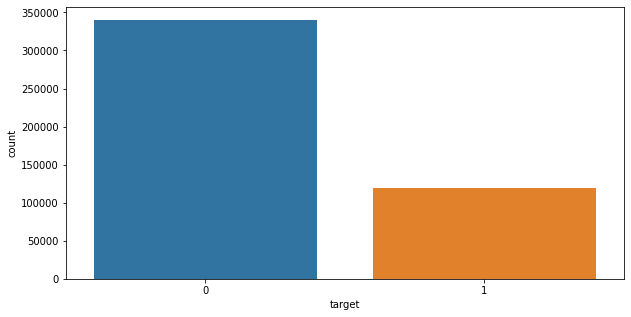

In [0]:
# Visualizar la distribución de las etiquetas de cada clase (1:Default, 0:Non Default)
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))
train_labels_pandas = train_labels.toPandas()
sns.countplot(x=train_labels_pandas.target)
plt.show()

In [0]:
# Se verifica la existencia de "fuga de datos", la cual consiste en incorporar en el entrenamiento del modelo información que en realidad se quiere predecir, y esta misma información no estará disponible durante la inferencia. Para esto, verificaremos si algún cliente del conjunto de prueba "se filtra" en el conjunto de entrenamiento, es decir, analizar si ambos conjuntos de clientes son disjuntos o no.

# Obtener todos los customer_ID de train_df y test_df
train_customer_ids = train_df.select("customer_ID").distinct()
test_customer_ids = test_df.select("customer_ID").distinct()

# Verificar si hay algún ID en común
common_ids = train_customer_ids.join(test_customer_ids, "customer_ID", "inner")
common_ids_count = common_ids.count()

if common_ids_count == 0:
    print("Los conjuntos son disjuntos")
else:
    print("Los conjuntos no son disjuntos")
    print(f"Hay {common_ids_count} customer_ID en común entre train_df y test_df")

Los conjuntos son disjuntos


In [0]:
# Transformación campo fecha en tipo datetime para train_df y test_df
from pyspark.sql.functions import to_date, col, min, max
train_df = train_df.withColumn("S_2", to_date(col("S_2"), 'yyyy-MM-dd'))
test_df = test_df.withColumn("S_2", to_date(col("S_2"), 'yyyy-MM-dd'))

# Ver limites de fechas en ambos DataFrame (DF)
train_min_date = train_df.agg(min(col("S_2")).alias("min_date")).collect()[0]["min_date"]
train_max_date = train_df.agg(max(col("S_2")).alias("max_date")).collect()[0]["max_date"]
test_min_date = test_df.agg(min(col("S_2")).alias("min_date")).collect()[0]["min_date"]
test_max_date = test_df.agg(max(col("S_2")).alias("max_date")).collect()[0]["max_date"]
print(f"Fechas mínimas y máximas en train_df: {train_min_date}, {train_max_date}")
print(f"Fechas mínimas y máximas en test_df: {test_min_date}, {test_max_date}")


Fechas mínimas y máximas en train_df: 2017-03-01, 2018-03-31
Fechas mínimas y máximas en test_df: 2018-04-01, 2019-10-31


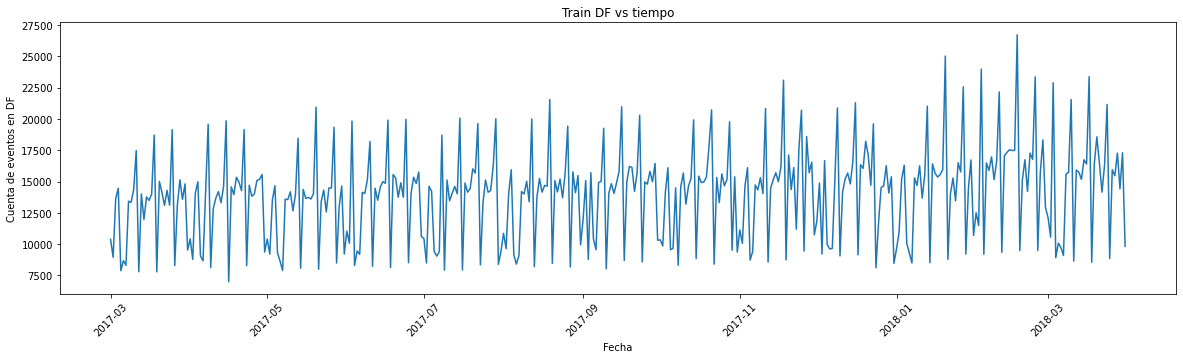

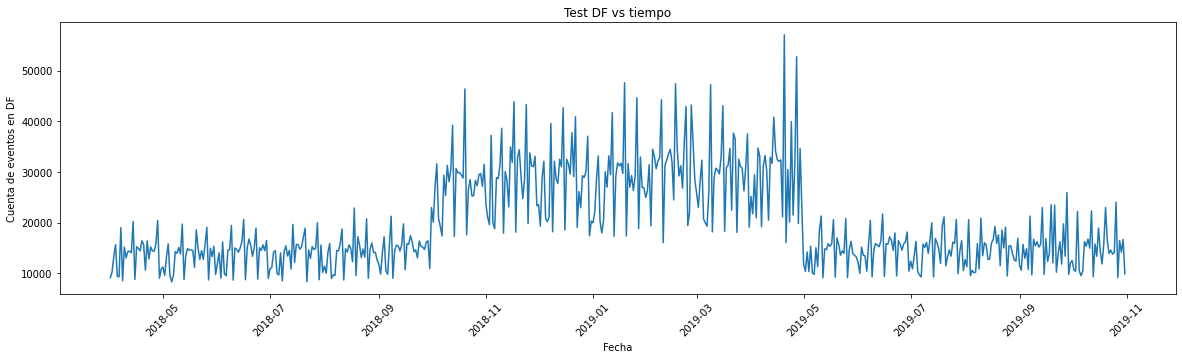

In [0]:
# Ver evolución de eventos en los dataset a lo largo del tiempo
def graph_customer_id(df, name_df):
    count_by_date = df.groupBy("S_2").count().orderBy("S_2")
    count_by_date_pd = count_by_date.toPandas()
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(count_by_date_pd["S_2"], count_by_date_pd["count"])
    plt.title(name_df + " vs tiempo")
    plt.xlabel("Fecha")
    plt.ylabel("Cuenta de eventos en DF")
    plt.xticks(rotation=45)
    plt.show()

graph_customer_id(train_df, "Train DF")
graph_customer_id(test_df, "Test DF")

In [0]:
# Verificar si los IDs de train_labels están en train_df y/o en test_df
labels_ids = train_labels.select("customer_ID").distinct()

train_df_ids = train_df.select("customer_ID").distinct()
test_df_ids = test_df.select("customer_ID").distinct()

missing_train_ids = labels_ids.join(train_df_ids, "customer_ID", "left_anti")
missing_test_ids = labels_ids.join(test_df_ids, "customer_ID", "left_anti")

missing_train_ids_count = missing_train_ids.count()
missing_test_ids_count = missing_test_ids.count()

if missing_train_ids_count == 0:
    print("Todos los customer_ID de train_labels están en train_df")
else:
    print(f"Hay {missing_train_ids_count} customer_ID de train_labels que no están en train_df")

if missing_test_ids_count == 0:
    print("Todos los customer_ID de train_labels están en test_df")
else:
    print(f"Hay {missing_test_ids_count} customer_ID de train_labels que no están en test_df")


Todos los customer_ID de train_labels están en train_df
Hay 458913 customer_ID de train_labels que no están en test_df


In [0]:
# Contar el total de registros en train_df
total_records = train_df.count()

# Contar los registros únicos de train_df
unique_records = train_df.select("customer_ID").distinct().count()

# Imprimir los resultados
print(f"Total de registros: {total_records}")
print(f"Registros únicos de customer_ID: {unique_records}")

# Verificar si hay duplicados
if total_records > unique_records:
    print("Hay duplicados en la columna customer_ID.")
else:
    print("No hay duplicados en la columna customer_ID.")

Total de registros: 5531451
Registros únicos de customer_ID: 458913
Hay duplicados en la columna customer_ID.


La información recabada en el análisis exploratorio nos servirá más adelante para poder tomar decisiones sobre los datasets y generar estrategias para depurarlos.

### Ingeniería de características

In [0]:
# Se agregan las etiquetas de train_labels a train_df
train_df = train_df.join(train_labels, on="customer_ID", how="left")

In [0]:
# Se crea lista sin las columnas "customer_ID" y fecha ("S_2") para análisis.
drop_columns = ['customer_ID', 'S_2']
features = [col for col in train_df.columns if col not in drop_columns]

# Además, según fue informado en enunciado, los nombres de las columnas categóricas son las siguientes:
categorical_col = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Por ende las columnas numéricas son las siguientes:
numerical_col = [col for col in features if col not in categorical_col + ['target']]

In [0]:
# Se analiza la distribución de la variable objetivo (columna "target") en train_df
count_df = train_df.groupBy("target").agg(count("target").alias("count"))
total_rows = train_df.count()
distribution_df = count_df.withColumn("percentage", (col("count") / total_rows) * 100)
distribution_df.show()

+------+-------+------------------+
|target|  count|        percentage|
+------+-------+------------------+
|     1|1377869|24.909720794778803|
|     0|4153582|  75.0902792052212|
+------+-------+------------------+



Al analizar la distribución de etiquetas en el conjunto de entrenamiento, se logra apreciar con claridad que el conjunto está desequilibrado, por cuanto el 25% de los registros cae en default. Lo que seguirá, es analizar, cuantos clientes son los que componen estas distribuciones, es decir, quitando id duplicados.

In [0]:
# Se analiza la distribución de la variable objetivo quitando id de clientes duplicados.
train_no_duplicates = train_df.dropDuplicates(["customer_ID"])
count_df = train_no_duplicates.groupBy("target").agg(count("target").alias("count"))
total_rows = train_no_duplicates.count()
distrin_df_no_dupl = count_df.withColumn("percentage", (col("count") / total_rows) * 100)
distrin_df_no_dupl.show()

+------+------+-----------------+
|target| count|       percentage|
+------+------+-----------------+
|     1|118828|25.89336105100531|
|     0|340085|74.10663894899469|
+------+------+-----------------+



Se logra apreciar que al quitar duplicados, la distribución 75/25 entre no default/default permanece constante. Dado este nivel de desbalanceo de datos, se puede hipotetizar a futuro, que utilizar técnicas de ensamble como bagging o boosting podrán ayudar a mejorar el rendimiento.

Dado este escenario, cualquier muestreo que se haga, dado el nivel desbalance, deberá ser estratificado.

In [0]:
# Se analiza la existencia de valores faltantes. Dado que el DF es muy grande, se tomará una muestra estratificada de los datos.
from pyspark.sql.functions import isnan, when, count, col

train_df_filter = train_df.select(features)
muestra = {1: 0.1 * 0.25, 0: 0.1 * 0.75}
train_df_sample = train_df_filter.sampleBy('target', fractions=muestra, seed=66)

nan_count_df = train_df_sample.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in train_df_sample.columns])
display(nan_count_df)

P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
2870,0,0,108,0,71367,108,108,305855,109996,0,0,109,0,0,78697,0,49558,0,21,0,1338,187992,0,0,0,1664,15629,0,268275,0,0,0,108,0,71367,0,0,12285,174298,2485,0,0,179992,0,0,0,42297,499,0,52487,0,0,0,0,216174,0,0,0,0,0,0,0,0,0,10211,0,0,0,0,0,0,342050,0,0,0,302195,0,0,145118,499,108,0,0,0,0,0,0,0,0,108,0,0,0,3,0,0,0,0,0,0,0,320746,0,0,0,0,0,0,345041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1318,16,1292,585,50,2187,0,5663,195677,0,0,0,6,0,7397,0,0,0,343804,0,343681,158,6,93456,0,0,9220,0,0,9220,9220,0,9220,0,0,0,0,0,0,5663,0,0,340249,5663,5663,319760,2284,0,336504,0,0,0,0,0,0,5663,292029,0,2189,0,0


In [0]:
# Tamaño de la muestra obtenida
print((train_df_sample.count(), len(train_df_sample.columns)))

(345213, 189)


In [0]:
# Se transforma DF con valores faltantes, que posee una sóla fila, un DF de pandas.
pandas_nan = nan_count_df.toPandas()

In [0]:
# Se obtienen las columnas que contienen muchos valores vacíos, y que no serán parte del modelo. Se usará la siguente regla: si cotiene más del 20% de los registros vacíos, será descartada la columna, y por ende estará en la lista que se llamará "col_to_drop".
ppandas_nan_t = pandas_nan.transpose()
ppandas_nan_t = ppandas_nan_t.rename({0: 'count'}, axis='columns').sort_values(by=['count'], ascending=False)
top_nan = ppandas_nan_t.loc[ppandas_nan_t['count'] > train_df_sample.count() * 0.2].copy()
col_to_drop = list(top_nan.index)
col_to_drop

Out[9]: ['D_88',
 'D_110',
 'B_39',
 'D_73',
 'B_42',
 'D_134',
 'B_29',
 'D_132',
 'D_42',
 'D_76',
 'D_142',
 'D_53',
 'B_17',
 'D_105',
 'D_50',
 'S_9',
 'D_56',
 'D_77',
 'D_43',
 'S_27',
 'D_46',
 'S_3',
 'S_7']

In [0]:
# Se eliminan columnas con una cantidad de datos vacíos determinada anteriormente del DF de entrenamiento.
new_train_col = [col for col in train_df.columns if col not in col_to_drop + ['S_2']]
train_df = train_df.select(new_train_col)

# Se eliminan registros con datos vacíos
train_df_clean = train_df.dropna()

In [0]:
# Se replica filtro de columnas para el DF de prueba.
new_test_col = [col for col in test_df.columns if col not in col_to_drop + ['S_2']]
test_df = test_df.select(new_test_col)

# Se eliminan registros con datos vacíos
test_df_clean = test_df.dropna()

In [0]:
# Se procederán a inspeccionar las correlaciones. Se utiliza un muestreo estratificado.
from pyspark.sql import functions as F
from functools import reduce
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

train_col = [col for col in train_df_clean.columns if col not in ['S_2', 'customer_ID']]
train_df_sample = train_df_clean.select(train_col)
muestra = {1: 0.05 * 0.25, 0: 0.05 * 0.75}
train_df_sample = train_df_sample.sampleBy('target', fractions=muestra, seed=66)

# Definir las columnas de features (todas menos 'target')
feature_cols = [col for col in train_df_sample.columns if col != 'target']

# Convertir todas las columnas a tipo Double
for col in feature_cols + ['target']:
    train_df_sample = train_df_sample.withColumn(col, train_df_sample[col].cast("double"))

# Convertir las columnas de features en un solo vector densamente poblado
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_df = assembler.transform(train_df_sample)

# Calcular la matriz de correlación entre 'target' y los vectores de características
correlation_matrix = Correlation.corr(assembled_df, "features").head()

# Obtener las correlaciones respecto a 'target' (la última columna de la matriz)
correlations = correlation_matrix[0].toArray()[-1]

In [0]:
# Se unen las columnas a sus correlaciones
from pyspark.sql.types import StructType, StructField, StringType, FloatType
schema = StructType([
    StructField("feature", StringType(), True),
    StructField("correlation", FloatType(), True)])
correlations = [float(corr) for corr in correlations]
data = [(feature_cols[i], correlations[i]) for i in range(len(feature_cols))]
correlation_df = spark.createDataFrame(data, schema)
sorted_corr_df = correlation_df.orderBy(correlation_df.correlation.desc())

In [0]:
# Filtrar las características con correlación menor a 0.05 y mayor a -0.05
filtered_correlation_df = correlation_df.filter((correlation_df.correlation < 0.05) & (correlation_df.correlation > -0.05))
drop_list = [row['feature'] for row in filtered_correlation_df.collect()]
print(f'Columnas a borrar: {drop_list}')

Columnas a borrar: ['D_39', 'D_41', 'B_5', 'R_2', 'D_49', 'B_6', 'P_3', 'B_10', 'S_5', 'S_6', 'D_54', 'R_4', 'B_12', 'S_8', 'B_13', 'B_14', 'D_60', 'B_15', 'S_11', 'D_63', 'D_65', 'S_12', 'R_6', 'S_13', 'B_21', 'D_69', 'D_71', 'S_15', 'B_24', 'R_7', 'B_25', 'B_26', 'R_8', 'R_9', 'S_16', 'D_80', 'R_11', 'B_27', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13', 'D_83', 'R_14', 'R_15', 'R_16', 'S_18', 'D_86', 'D_87', 'R_18', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_20', 'R_21', 'D_89', 'R_22', 'R_23', 'D_91', 'D_92', 'D_93', 'D_94', 'R_24', 'R_25', 'D_96', 'S_22', 'S_24', 'S_26', 'D_102', 'D_106', 'B_36', 'R_26', 'D_108', 'D_109', 'D_111', 'D_112', 'B_40', 'D_116', 'D_117', 'D_124', 'D_126', 'D_129', 'B_41', 'D_133', 'R_28']


In [0]:
# Borrar columnas con baja correlacion
clean_col_train = [col for col in train_df_clean.columns if col not in drop_list]
train_df_final = train_df_clean.select(clean_col_train)
clean_col_test = [col for col in test_df_clean.columns if col not in drop_list]
test_df_final = test_df_clean.select(clean_col_test)

In [0]:
# Borrar de memoria algunos DataFrames que ya no se usarán
del train_df
del train_df_clean
del test_df
del test_df_clean
del train_df_sample
del assembled_df

A continuación, se realizará la agrupación de id de cliente, calculando la media y última operacíón de cada columna numérica; y el conteo y última operacion de cada columna categórica, para el DF de entrenamiento

In [0]:
# Agrupar columnas numéricas de train_df_final
train_num_col = [col for col in numerical_col if col in train_df_final.columns]
train_num_col = [col for col in train_df_final.columns if col in train_num_col + ['customer_ID']]
train_num_df = train_df_final.select(train_num_col)

# Crear una lista de expresiones de agregación para cada columna numérica
agg_exprs = []
for col in train_num_col:
    agg_exprs.extend([
        F.mean(col).alias(f"{col}_mean"),
        F.last(col, ignorenulls=True).alias(f"{col}_last")])

# Agrupar por 'customer_ID' y aplicar las agregaciones
train_num_agg = train_num_df.groupBy('customer_ID').agg(*agg_exprs)
train_num_agg = train_num_agg.drop('customer_ID_mean', 'customer_ID_last')
train_num_agg = train_num_agg.orderBy('customer_ID')

In [0]:
# Agrupar columnas categóricas de train_df_final
train_cat_col = [col for col in categorical_col if col in train_df_final.columns]
train_cat_col = [col for col in train_df_final.columns if col in train_cat_col + ['customer_ID']]
train_cat_df = train_df_final.select(train_cat_col)

# Crear una lista de expresiones de agregación para cada columna categórica
agg_exprs = []
for col in train_cat_col:
    agg_exprs.extend([
        F.last(col, ignorenulls=True).alias(f"{col}_last"),
        F.count(col).alias(f"{col}_count"),
        F.countDistinct(col).alias(f"{col}_countDistinct")])

# Agrupar por 'customer_ID' y aplicar las agregaciones
train_cat_agg = train_cat_df.groupBy('customer_ID').agg(*agg_exprs)
train_cat_agg = train_cat_agg.drop('customer_ID_last', 'customer_ID_count', 'customer_ID_countDistinct')
train_cat_agg = train_cat_agg.orderBy('customer_ID')

In [0]:
# Concatenar DF agrupados derivados de df_train
train_agg = train_num_agg.join(train_cat_agg, on='customer_ID', how='inner')

# Añadir etiqueta desde train_labels
train_final = train_agg.join(train_labels, on='customer_ID', how='left')

A continuación, se realizará la agrupación de id de cliente, calculando la media y última operacíón de cada columna numérica; y el conteo y ultima operacion de cada columna categórica, para el DF de testeo

In [0]:
# Agrupar columnas numéricas de test_df_final
test_num_col = [col for col in numerical_col if col in test_df_final.columns]
test_num_col = [col for col in test_df_final.columns if col in test_num_col + ['customer_ID']]
test_num_df = test_df_final.select(test_num_col)

# Crear una lista de expresiones de agregación para cada columna numérica
agg_exprs = []
for col in test_num_col:
    agg_exprs.extend([
        F.mean(col).alias(f"{col}_mean"),
        F.last(col, ignorenulls=True).alias(f"{col}_last")])

# Agrupar por 'customer_ID' y aplicar las agregaciones
test_num_agg = test_num_df.groupBy('customer_ID').agg(*agg_exprs)
test_num_agg = test_num_agg.drop('customer_ID_mean', 'customer_ID_last')
test_num_agg = test_num_agg.orderBy('customer_ID')

In [0]:
# Agrupar columnas categóricas de test_df_final
test_cat_col = [col for col in categorical_col if col in test_df_final.columns]
test_cat_col = [col for col in test_df_final.columns if col in test_cat_col + ['customer_ID']]
test_cat_df = test_df_final.select(test_cat_col)

# Crear una lista de expresiones de agregación para cada columna categórica
agg_exprs = []
for col in test_cat_col:
    agg_exprs.extend([
        F.last(col, ignorenulls=True).alias(f"{col}_last"),
        F.count(col).alias(f"{col}_count"),
        F.countDistinct(col).alias(f"{col}_countDistinct")])

# Agrupar por 'customer_ID' y aplicar las agregaciones
test_cat_agg = test_cat_df.groupBy('customer_ID').agg(*agg_exprs)
test_cat_agg = test_cat_agg.drop('customer_ID_last', 'customer_ID_count', 'customer_ID_countDistinct')
test_cat_agg = test_cat_agg.orderBy('customer_ID')

In [0]:
# Concatenar DF agrupados derivados de df_test
test_final = test_num_agg.join(test_cat_agg, on='customer_ID', how='inner')

In [0]:
# Guardar train_final en el sistema de archivos distribuido (DBFS), para que persista.
train_final.write.mode('overwrite').parquet("dbfs:/tmp/wiki_data/train_df_final.parquet")

In [0]:
# Guardar test_final en el sistema de archivos distribuido (DBFS), para que persista.
test_final.write.mode('overwrite').parquet("dbfs:/tmp/wiki_data/test_df_final.parquet")